# IST 317 Machine Learning

## Spring 2019

### Chapter 3 homework: credit card fraud detection

#### Tram Nguyen, Alex Stout

In this assignment, you will train some classifiers to try to detect a fraudulent transaction, based on several predictors. The dataset is provided, in the file named creditcard.csv. Each row represents a transaction, with 28 predictors, the amount of the transaction, and a class: 0 for suspected fraud, 1 for a good transaction.

In [199]:
# Load the file into a Pandas dataframe and display the frame
%matplotlib inline

import pandas as pd

#get the path of the project and load the excel file
creditcard = pd.read_csv("creditcard.csv", thousands=",");

#display the data
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [200]:
# look at the frame's metadata to see the types of the columns, 
# and if there is any missing data

#Check the types of columns in the dataset to see if there is missing data
creditcard.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [201]:
# examine the characteristics of the numerical data

#Check the characteristics of the dataset of each column 
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


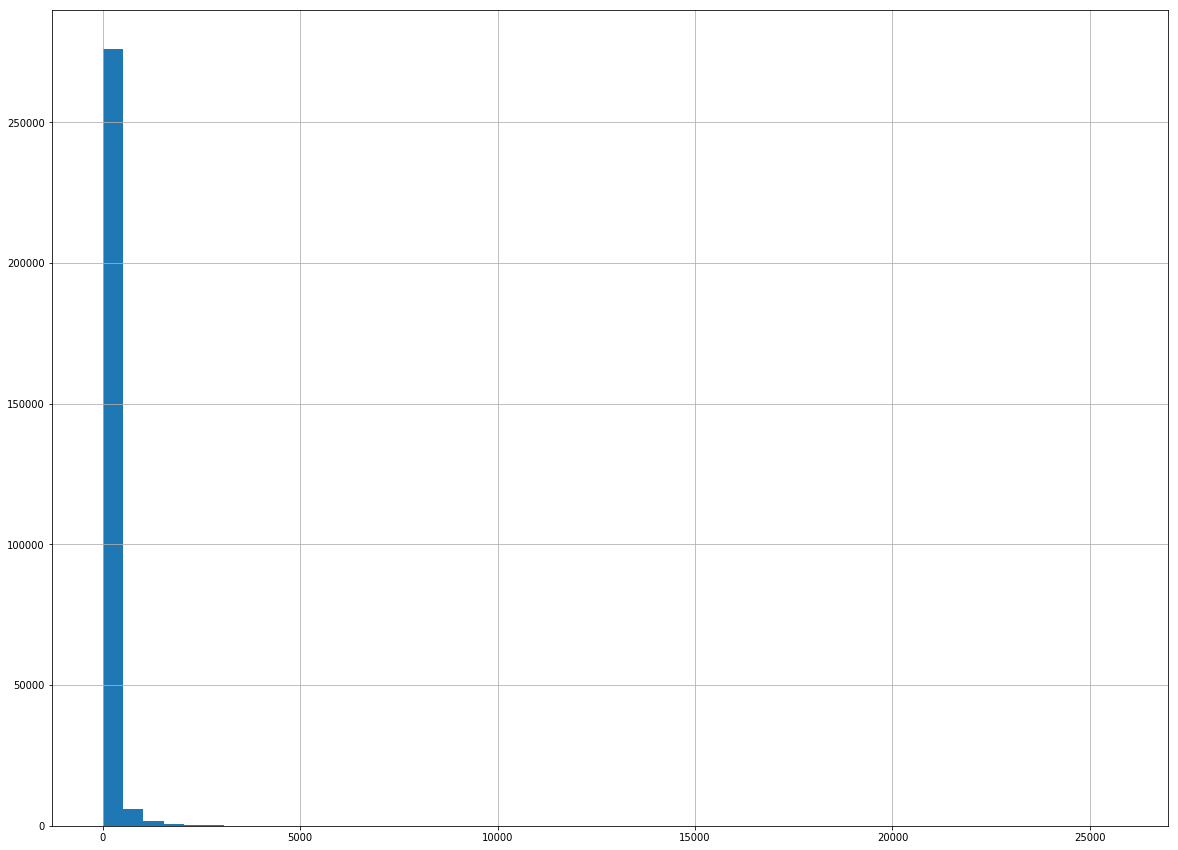

In [202]:
import matplotlib.pyplot as plt

#Create the histogram of the dataset from the Amount Column
creditcard['Amount'].hist(bins=50, figsize=(20, 15))
plt.show()


# About that histogram

What does the histogram tell you about how the Amount feature is distributed? What, if anything, should you do to the data, based on the histogram? Edit this Markdown cell and type your answer here:

The histogram tells us that the data for Amount feature is tail heavy. 
In order to make this data be more evenly distributed, we would decrease the 
scale(using stand scaler).

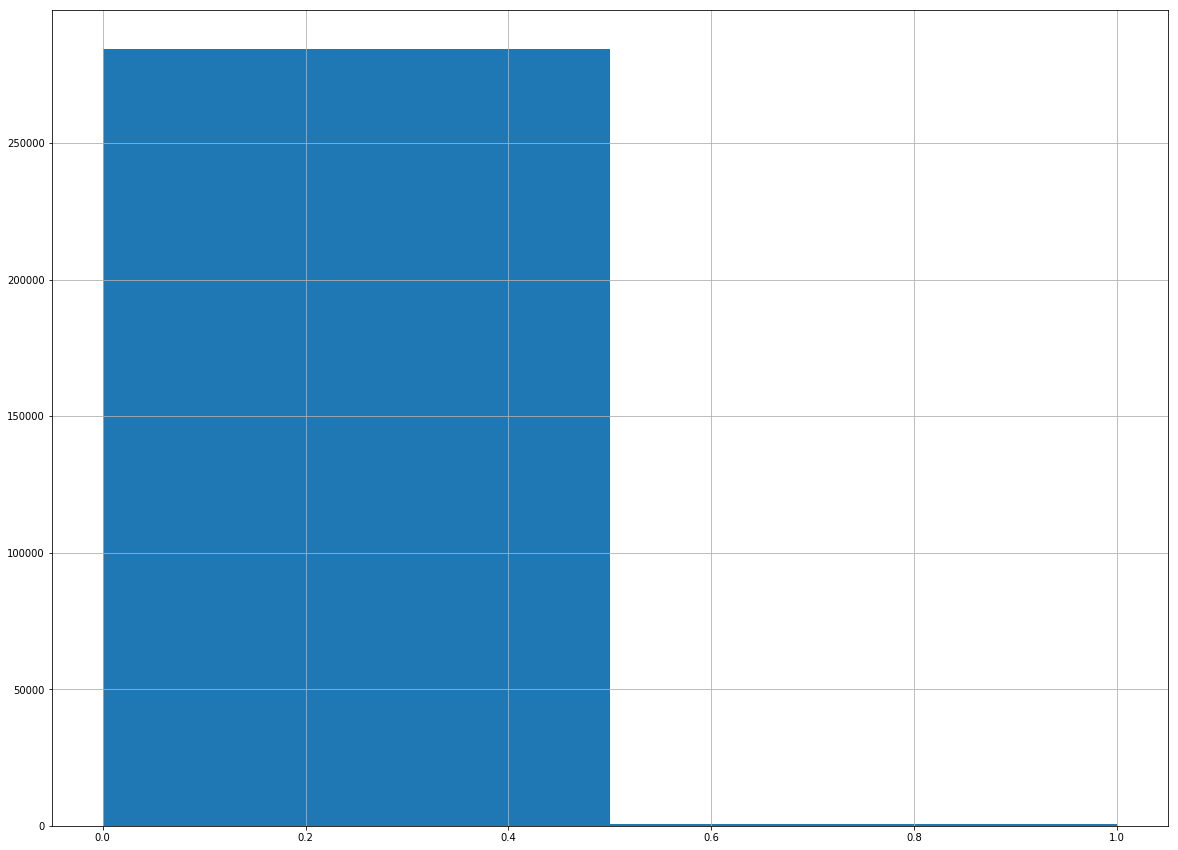

In [203]:
# Now, create a histogram of the Class field 
# (i.e., the labels - is class field flgged as fradulant or not)
#0 not fraudulant and 1 is fradulent 

#Shows us a histogram of the class field to see easily see the proportion between fradulent and non-fradulent transactions.
creditcard['Class'].hist(bins=2, figsize=(20, 15))
plt.show()


In [204]:
# Now, look at the value_counts() for the Class feature, to 
# gain further insight

#Shows exactly how many transactions are fraudulant v.s. not fraudulant
creditcard['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

# About *that* histogram and data

What does the histogram of the labels tell you? Write your answer here:

The histogram of labels tell us that, in most cases, the credit card transaction is not fraudulent. 

This information tells us that if we were to randomly select a piece of data from the file, it most likely would not be fraudulant. We want to be able to select data that is actually fradulant in order to have a proportion that will truely represent the data. This is so we can make accurate predictions. 




# Split and prepare the data

In the following cells, split the data into test and training data, and perform any preprocessing before training ML models. 


In [209]:
# split data into training and testing sets, and then examine the
# value_counts() for the training and testing sets, to make sure
# each set is representative of the whole dataset

from sklearn.model_selection import StratifiedShuffleSplit

#places 20 percent of the data into a dataframe for testing and 80% of the data into a separate data frame for training
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=68333)
for train_index, test_index in split.split(creditcard, creditcard['Class']):
   
    #create datadrames for holding the data
    strat_train_set = creditcard.loc[train_index]
    strat_test_set = creditcard.loc[test_index]
    
# look at the percent of each value in each Class category in the training set    
strat_train_set['Class'].value_counts() / len(strat_train_set)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [208]:
# look at the percent of values in each Class category in the test set 
strat_test_set['Class'].value_counts() / len(strat_test_set)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [210]:
# ditto for the full data set; make sure the percentages are close

#Check the whole dataset's percentages for the class attribute
creditcard['Class'].value_counts() / len(creditCard)

0    1.247844
1    0.002159
Name: Class, dtype: float64

In [213]:
# separate the predictors from the labels in the training set

#Drop the Class field from the training set 
creditCard = strat_train_set.drop('Class', axis=1)

#create a copy of the Class field from the training set 
creditCard_labels = strat_train_set['Class'].copy()


In [216]:
# create transformation pipleline(s) to prepare the training data for use in 
# a ML algorithm

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

#selects the column names and preform fit and transforms functions
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
    
#creates a pipeline to make the process time of performing transformations that prepare the data faster
#scale the data
full_pipeline = Pipeline([
    ('std_scaler', StandardScaler())])  

#fit and transform the dataset 
#The pipeline will make the process time shorter
card_prepared = full_pipeline.fit_transform(creditCard)

# Train a classifier on the data

In the cell below, train a SGD classifier to detect credit card fraud.


In [218]:
# create and train the SGD(standard gradient descent) classifier

import numpy as np

from sklearn.linear_model import SGDClassifier

# note parameter to enable use of all your cores
#create the SDG classifier using the same random seed as the shuffle split
sgd_clf = SGDClassifier(random_state=68333, n_jobs=-1)         

# this will produce an error warning about how some of the default 
# parameter values are chaning soon; we can ignore this warning. 
#fit the data to the model with labels(Class field)
sgd_clf.fit(card_prepared, creditCard_labels)


C:\Users\tram.nguyen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=68333, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [219]:
# perform cross-validation to evaluate the quality of the model

from sklearn.model_selection import cross_val_score

#check how accurate the model is at predicting
y_scores = cross_val_score(sgd_clf, card_prepared, creditCard_labels, cv=3, scoring='accuracy', n_jobs=-1)

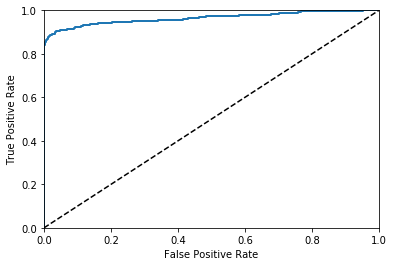

In [220]:
# prepare and plot the ROC curve to visualize the quality of the model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

#make a prediction on if the charge is fraudulant or not
y_scores_predict = cross_val_predict(sgd_clf, card_prepared, creditCard_labels, cv=3, method='decision_function', n_jobs=-1)

# calculate the ROC curve points for the SGD classifier
#comparing what the labels are to what the model found.
#the predictions and actual lavels on a ROC_curve
fpr, tpr, thresholds = roc_curve(creditCard_labels, y_scores_predict)

'''
 * Function to plot the ROC curve
'''
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
# plot the curve   
plot_roc_curve(fpr, tpr)
plt.show()

# And then another classifier

In the cells below, train and evaluate a Random Forest classifier to detect credit card fraud.


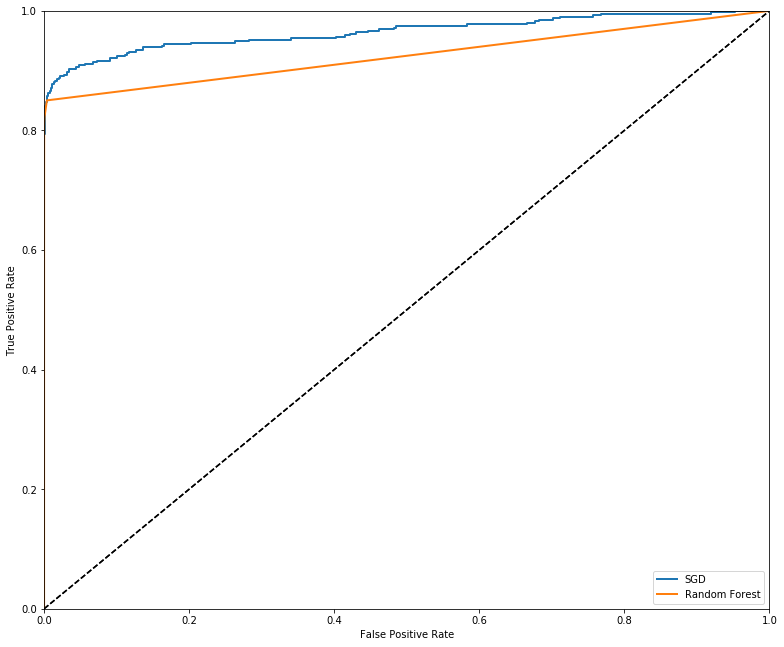

In [221]:
# train the RandomForestClassifier, and then plot it's ROC 
# curve along with the SGD classifier's curve

from sklearn.ensemble import RandomForestClassifier

# train a Random Forest Classifier
forest_clf = RandomForestClassifier(random_state=68333, n_jobs=-1)

# A binary RFC returns a list of pairs of probabilities [a, b], 
# where a is the probability an instance is a negative and b 
# is the probability the instance is positive. Gather these 
# pairs via cross-value prediction
card_probas_forest = cross_val_predict(forest_clf, card_prepared, creditCard_labels, 
                                    cv=3, method='predict_proba', n_jobs=-1)

# We need one score per instance to do the ROC curve, so we will
# just take the positive probability value from each pair
creditCard_labels_forest = card_probas_forest[:, 1]

# calculate the ROC curve points and display the results,
# against the SGD classifier
fpr_forest, tpr_forest, thresholds_forest = roc_curve(creditCard_labels, creditCard_labels_forest)


plt.rcParams['figure.figsize'] = (13,11)    
plot_roc_curve(fpr, tpr, 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')

plt.show()


In [223]:
# Now, display the area under the ROC curve for both 
# models

from sklearn.metrics import roc_auc_score

# and, finally, show the area under the ROC curve for both models. The areas shows us how accurate the predictions
#are for each of the models. 
#See how accurate the predictions for each model are so we know which one to choose 
print('SGD area under ROC curve:', roc_auc_score(creditCard_labels, y_scores_predict))
print('RF area under ROC curve:', roc_auc_score(creditCard_labels, creditCard_labels_forest))


#print('SGD area under ROC curve:', roc_auc_score(card_labels, y_scores))
#print('RF area under ROC curve:', roc_auc_score(card_labels, y_scores_forest))

SGD area under ROC curve: 0.964214415390233
RF area under ROC curve: 0.9247482924140498


# Wrapping up

Which of your current models is the best predictor of credit card fraud? Why do you say that? Write your answer below:


SGD is the better model predictor because the area under the curve is 
greater of SGD is greater than RF. 